In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
#load data
data = pd.read_csv("data/prepared_data_au.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m%d %H:%M:%S%f')
data = data.set_index('timestamp').sort_index()
data = data.drop(['last_settlement_price', 'last_close', 'last_open_interest', 'open'], axis=1)

In [3]:
to_fix = data.reset_index()
shifted = to_fix['timestamp'].where(to_fix['timestamp'].dt.hour < 20, to_fix['timestamp'] - pd.Timedelta(1, 'd'))
to_fix['timestamp'] = shifted
to_fix = to_fix.set_index('timestamp').sort_index()

amount_min = to_fix.groupby('date')['amount'].apply(lambda x: pd.Series([x.min()], index=[x.index[0]]))
amount_min = amount_min.reset_index(0, drop=True)
to_fix['amount'] = to_fix['amount'].diff()
to_fix.loc[amount_min.index, 'amount'] = amount_min

volume_min = to_fix.groupby('date')['volume'].apply(lambda x: pd.Series([x.min()], index=[x.index[0]]))
volume_min = volume_min.reset_index(0, drop=True)
to_fix['volume'] = to_fix['volume'].diff()
to_fix.loc[volume_min.index, 'volume'] = volume_min

# to_fix['volume'] = to_fix['volume'].where(to_fix['volume'] == 0, to_fix['volume'].diff())
to_fix['vwap'] = to_fix['amount']/to_fix['volume']
to_fix

,date,last_price,high,low,volume,amount,open_interest,min,ms,bid_1,...,ask_size_3,bid_4,bid_size_4,ask_4,ask_size_4,bid_5,bid_size_5,ask_5,ask_size_5,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-05-16 20:59:00.500,20220517,399.30,0.0,0.00,0.0,0.0,0,20:59:00,500,372.00,...,1,366.00,1,427.00,1,364.00,1,429.00,1,NaN
2022-05-16 21:00:02.000,20220517,399.30,0.0,0.00,0.0,0.0,0,21:00:02,0,372.04,...,3,368.00,1,425.00,1,366.00,1,427.00,1,NaN
2022-05-16 21:00:05.000,20220517,399.30,0.0,0.00,0.0,0.0,0,21:00:05,0,390.92,...,1,370.00,1,424.82,3,368.00,1,425.00,1,NaN
2022-05-16 21:00:05.500,20220517,399.30,0.0,0.00,0.0,0.0,0,21:00:05,500,390.92,...,1,368.00,1,424.82,3,366.00,1,425.00,1,NaN
2022-05-16 21:00:06.000,20220517,399.30,0.0,0.00,0.0,0.0,0,21:00:06,0,390.92,...,1,370.00,1,424.82,3,368.00,1,425.00,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 14:59:59.000,20230428,444.10,445.5,442.62,1.0,444100.0,104642,14:59:59,0,443.98,...,6,443.92,1,444.20,6,443.90,7,444.22,3,444100.0
2023-04-28 14:59:59.500,20230428,444.04,445.5,442.62,1.0,444040.0,104642,14:59:59,500,443.98,...,5,443.92,1,444.20,6,443.90,7,444.22,3,444040.0
2023-04-28 15:00:00.000,20230428,444.04,445.5,442.62,0.0,0.0,104642,15:00:00,0,444.00,...,5,443.94,1,444.20,6,443.92,1,444.22,3,NaN


In [4]:
to_fix.index = to_fix.index.set_names(['time'])
to_fix = to_fix[~to_fix.index.duplicated()]

In [5]:
to_fix.loc[:, ['date', 'volume', 'amount', 'bid_1', 'bid_size_1', 'ask_1',
       'ask_size_1', 'bid_2', 'bid_size_2', 'ask_2', 'ask_size_2', 'bid_3',
       'bid_size_3', 'ask_3', 'ask_size_3', 'bid_4', 'bid_size_4', 'ask_4',
       'ask_size_4', 'bid_5', 'bid_size_5', 'ask_5', 'ask_size_5', 'vwap']].to_csv('data\data_night_shifted_au.csv.gz', compression="gzip")

In [6]:
period = 2*60*5
period

600

In [7]:
period = 2*60*5
sl_ratio = 2
tp_ratio = 4

potential_list = []
wealth_factor = {'long': [], 'short': []}

for i, (d, df) in enumerate(to_fix.groupby('date')):
    # if i < 60:
    #     continue
    df = df[~df.index.duplicated()]
    night_hour = (df.index.time >= datetime.time(21,5,0)) | (df.index.time < datetime.time(2,25,0))
    morning_hour = (df.index.time >= datetime.time(9,5,0)) & (df.index.time < datetime.time(11,25,0))
    afternoon_hour = (df.index.time >= datetime.time(13,35,0)) & (df.index.time < datetime.time(14,55,0))
    trading_idx = df.index[night_hour | morning_hour | afternoon_hour]
    bid = df['bid_1']
    ask = df['ask_1']
    full_half_sec = pd.date_range(df.index.min(), df.index.max(), freq=pd.Timedelta(0.5, 's'))
    # break

    filled_bid = bid[~bid.index.duplicated()].reindex(full_half_sec).interpolate(method='pad', limit=period, limit_direction='forward').dropna()
    filled_ask = ask[~ask.index.duplicated()].reindex(full_half_sec).interpolate(method='pad', limit=period, limit_direction='forward').dropna()
    spread = (ask/bid) - 1
    spread = spread.rolling(50).mean() + (10/1000)/((bid + ask)/2) #10 yuan per lot
    # spread = spread.clip(lower=) #10 yuan per lot
    spread = spread.reindex(trading_idx)
    sl_short = 1/(1+sl_ratio*spread)
    sl_long = 1-sl_ratio*spread
    tp_short = 1/(1-tp_ratio*spread)
    tp_long = 1+tp_ratio*spread
    long_s = []
    short_s = []


    if period != 600:
        raise RuntimeError('what the fuck')
    for i in range(1, period+1):
        short_s.append(2 - (filled_ask.shift(-i).reindex(trading_idx)/filled_bid.reindex(trading_idx)))
        long_s.append((filled_bid.shift(-i).reindex(trading_idx)/filled_ask.reindex(trading_idx)))
    
    short_pnl = pd.concat(short_s, axis=1, ignore_index=True)
    long_pnl = pd.concat(long_s, axis=1, ignore_index=True)

    short_tp_breach = np.argmax((short_pnl >= tp_short.values[:,np.newaxis]), axis=1)
    short_tp_breach[short_tp_breach == 0] = short_pnl.shape[1]
    short_sl_breach = np.argmax((short_pnl <= sl_short.values[:,np.newaxis]), axis=1)
    short_sl_breach[short_sl_breach == 0] = short_pnl.shape[1]

    long_tp_breach = np.argmax((long_pnl >= tp_short.values[:,np.newaxis]), axis=1)
    long_tp_breach[long_tp_breach == 0] = long_pnl.shape[1]
    long_sl_breach = np.argmax((long_pnl <= sl_short.values[:,np.newaxis]), axis=1)
    long_sl_breach[long_sl_breach == 0] = long_pnl.shape[1]

    short_tp_trig = (short_tp_breach < short_sl_breach)
    short_sl_trig = (short_sl_breach < short_tp_breach)
    long_tp_trig = (long_tp_breach < long_sl_breach)
    long_sl_trig = (long_sl_breach < long_tp_breach)

    short_tp_breach = np.argmax((short_pnl >= tp_short.values[:,np.newaxis]), axis=1)
    short_tp_breach[short_tp_breach == 0] = short_pnl.shape[1]
    short_sl_breach = np.argmax((short_pnl <= sl_short.values[:,np.newaxis]), axis=1)
    short_sl_breach[short_sl_breach == 0] = short_pnl.shape[1]

    long_tp_breach = np.argmax((long_pnl >= tp_short.values[:,np.newaxis]), axis=1)
    long_tp_breach[long_tp_breach == 0] = long_pnl.shape[1]
    long_sl_breach = np.argmax((long_pnl <= sl_short.values[:,np.newaxis]), axis=1)
    long_sl_breach[long_sl_breach == 0] = long_pnl.shape[1]

    short_tp_trig = (short_tp_breach < short_sl_breach)
    short_sl_trig = (short_sl_breach < short_tp_breach)
    long_tp_trig = (long_tp_breach < long_sl_breach)
    long_sl_trig = (long_sl_breach < long_tp_breach)

    # print(f"ltp={long_tp_trig.sum()} lsl={long_sl_trig.sum()} stp={short_tp_trig.sum()} ssl={short_sl_trig.sum()}")

    short_wealth_factor = short_pnl.iloc[:,-1].copy()
    short_wealth_factor[short_tp_trig] = tp_short[short_tp_trig]
    short_wealth_factor[short_sl_trig] = sl_short[short_sl_trig]

    long_wealth_factor = long_pnl.iloc[:,-1].copy()
    long_wealth_factor[long_tp_trig] = tp_long[long_tp_trig]
    long_wealth_factor[long_sl_trig] = sl_long[long_sl_trig]

    del long_pnl
    del short_pnl

    wealth_factor['short'].append(short_wealth_factor)
    wealth_factor['long'].append(long_wealth_factor)

    long_potential = (long_wealth_factor > 1).mean()
    short_potential = (short_wealth_factor > 1).mean()

    long_mean_profit = long_wealth_factor[long_wealth_factor > 1].mean()
    short_mean_profit = short_wealth_factor[short_wealth_factor > 1].mean()

    # print(f"{d}: {long_potential=:.5f}, {long_mean_profit=:.5f}, {short_potential=:.5f}, {short_mean_profit=:.5f}")
    potential_list.append({'date': d, 'count': trading_idx.shape[0], 'long_signal_pct': long_potential, 'long_mean_profit': long_mean_profit,
                           'short_signal_pct': short_potential, 'short_mean_profit': short_mean_profit})

In [7]:
d

20230427

<AxesSubplot:xlabel='date'>

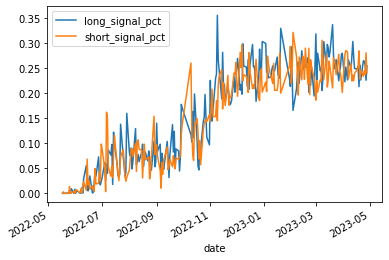

In [8]:
pot_df = pd.DataFrame(potential_list)
pot_df['date'] = pd.to_datetime(pot_df['date'].astype(str))
pot_df.set_index('date')[['long_signal_pct', 'short_signal_pct']].plot()

In [9]:
short_wealth = pd.concat(wealth_factor['short'])
short_wealth.name = 'short_wealth'
long_wealth = pd.concat(wealth_factor['long'])
long_wealth.name = 'long_wealth'

In [15]:
pd.concat([long_wealth, short_wealth], axis=1).reindex(to_fix.index)

,long_wealth,short_wealth
time,,
2022-05-16 20:59:00.500,NaN,NaN
2022-05-16 21:00:02.000,NaN,NaN
2022-05-16 21:00:05.000,NaN,NaN
2022-05-16 21:00:05.500,NaN,NaN
2022-05-16 21:00:06.000,NaN,NaN
...,...,...
2023-04-28 14:59:59.000,NaN,NaN
2023-04-28 14:59:59.500,NaN,NaN
2023-04-28 15:00:00.000,NaN,NaN


In [10]:
pd.concat([long_wealth, short_wealth], axis=1).reindex(to_fix.index).to_csv(r'label/5_min_tp4_sl2_10yuan_target.csv')

In [270]:
short_tp_breach = np.argmax((short_pnl >= tp_short.values[:,np.newaxis]), axis=1)
short_tp_breach[short_tp_breach == 0] = short_pnl.shape[1]
short_sl_breach = np.argmax((short_pnl <= sl_short.values[:,np.newaxis]), axis=1)
short_sl_breach[short_sl_breach == 0] = short_pnl.shape[1]

long_tp_breach = np.argmax((long_pnl >= tp_short.values[:,np.newaxis]), axis=1)
long_tp_breach[long_tp_breach == 0] = long_pnl.shape[1]
long_sl_breach = np.argmax((long_pnl <= sl_short.values[:,np.newaxis]), axis=1)
long_sl_breach[long_sl_breach == 0] = long_pnl.shape[1]

short_tp_trig = (short_tp_breach < short_sl_breach)
short_sl_trig = (short_sl_breach < short_tp_breach)
long_tp_trig = (long_tp_breach < long_sl_breach)
long_sl_trig = (long_sl_breach < long_tp_breach)

short_wealth_factor = short_pnl.iloc[:,-1]
short_wealth_factor[short_tp_trig] = tp_short[short_tp_trig]
short_wealth_factor[short_sl_trig] = sl_short[short_sl_trig]

long_wealth_factor = long_pnl.iloc[:,-1]
long_wealth_factor[long_tp_trig] = tp_long[long_tp_trig]
long_wealth_factor[long_sl_trig] = sl_long[long_sl_trig]

In [254]:
sl_short[short_sl_trig]

timestamp
2022-06-14 21:05:00.000    0.997935
2022-06-14 21:05:00.500    0.997953
2022-06-14 21:05:01.000    0.997959
2022-06-14 21:05:01.500    0.997973
2022-06-14 21:05:02.000    0.997983
                             ...   
2022-06-15 14:38:42.000    0.996901
2022-06-15 14:38:42.500    0.996905
2022-06-15 14:40:51.500    0.997197
2022-06-15 14:42:59.000    0.997078
2022-06-15 14:54:59.500    0.997523
Length: 1248, dtype: float64

In [236]:
long_sl_trig.sum()

3533

In [220]:
sl_short

timestamp
2022-06-14 21:05:00.000    0.997935
2022-06-14 21:05:00.500    0.997953
2022-06-14 21:05:01.000    0.997959
2022-06-14 21:05:01.500    0.997973
2022-06-14 21:05:02.000    0.997983
                             ...   
2022-06-15 14:54:16.500    0.997425
2022-06-15 14:54:28.000    0.997449
2022-06-15 14:54:28.500    0.997473
2022-06-15 14:54:29.000    0.997497
2022-06-15 14:54:59.500    0.997523
Length: 6332, dtype: float64

In [210]:
(10*4/1000)/((bid + ask)/2)

timestamp
2022-06-14 20:59:00.500    0.000100
2022-06-14 21:00:00.500    0.000100
2022-06-14 21:00:01.000    0.000100
2022-06-14 21:00:01.500    0.000100
2022-06-14 21:00:02.000    0.000100
                             ...   
2022-06-15 14:59:54.500    0.000101
2022-06-15 14:59:55.000    0.000101
2022-06-15 14:59:57.500    0.000101
2022-06-15 14:59:58.000    0.000101
2022-06-15 15:00:00.500    0.000101
Length: 6982, dtype: float64

In [202]:
short_pnl.iloc[:, 439]

timestamp
2022-06-14 21:05:00.000    1.000401
2022-06-14 21:05:00.500    0.999900
2022-06-14 21:05:01.000    0.999599
2022-06-14 21:05:01.500    0.999800
2022-06-14 21:05:02.000    0.999800
                             ...   
2022-06-15 14:54:16.500    0.998842
2022-06-15 14:54:28.000    0.998892
2022-06-15 14:54:28.500    0.998943
2022-06-15 14:54:29.000    0.998943
2022-06-15 14:54:59.500    0.998037
Name: 439, Length: 6332, dtype: float64

In [178]:
pd.get_dummies(np.argmax(short_pnl, axis=1), columns=np.arange(period)).values

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [187]:
short_pnl >= tp_short

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [ ]:
night = df.index.time

Index([20, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       ...
       14, 14, 14, 14, 14, 14, 14, 14, 14, 15],
      dtype='int32', name='timestamp', length=5194)

DatetimeIndex(['2022-05-30 21:05:36.500000',        '2022-05-30 21:05:37',
               '2022-05-30 21:05:37.500000',        '2022-05-30 21:05:38',
               '2022-05-30 21:05:38.500000',        '2022-05-30 21:05:39',
               '2022-05-30 21:05:39.500000',        '2022-05-30 21:06:21',
               '2022-05-30 21:06:21.500000', '2022-05-30 21:07:26.500000',
               ...
               '2022-05-31 14:43:48.500000',        '2022-05-31 14:43:49',
               '2022-05-31 14:43:49.500000', '2022-05-31 14:43:50.500000',
               '2022-05-31 14:43:56.500000', '2022-05-31 14:49:20.500000',
               '2022-05-31 14:49:48.500000', '2022-05-31 14:50:07.500000',
                      '2022-05-31 14:51:38',        '2022-05-31 14:52:17'],
              dtype='datetime64[ns]', name='timestamp', length=4500, freq=None)

In [150]:
short_pnl.max(1).sort_values()

timestamp
2022-08-07 20:59:00.500    0.995613
2022-08-08 02:29:59.000    0.996154
2022-08-08 02:29:59.000    0.996154
2022-08-08 02:29:58.500    0.996154
2022-08-08 14:59:59.500    0.996513
                             ...   
2022-08-07 21:01:38.500    1.001283
2022-08-07 21:01:39.000    1.001283
2022-08-07 21:01:40.500    1.001283
2022-08-07 21:01:41.000    1.001283
2022-08-08 15:00:00.500         NaN
Length: 10000, dtype: float64

In [143]:
short_pnl = pd.concat(short_s, axis=1)
long_pnl = pd.concat(long_s, axis=1)
long_potential = (long_pnl.max(1) > 1).mean()
short_potential = (short_pnl.max(1) > 1).mean()

In [140]:
short_pnl.max(1).sort_values().tail(10)

timestamp
2022-05-25 13:57:42.500    1.002235
2022-05-25 13:57:37.500    1.002235
2022-05-25 13:57:35.000    1.002235
2022-05-25 13:57:34.500    1.002235
2022-05-25 13:57:34.000    1.002235
2022-05-25 13:57:33.500    1.002235
2022-05-25 13:57:50.500    1.002235
2022-05-25 13:57:47.500    1.002235
2022-05-25 13:57:51.000    1.002235
2022-05-25 15:00:00.500         NaN
dtype: float64

In [123]:
short_pnl.max(1).sort_values()

timestamp
2022-05-18 20:59:00.500    0.927194
2022-05-18 21:00:01.000    0.927251
2022-05-18 21:00:01.500    0.927309
2022-05-18 21:00:02.000    0.927309
2022-05-18 21:00:02.500    0.927366
                             ...   
2022-05-18 23:51:34.000    0.999950
2022-05-18 23:51:29.000    1.000000
2022-05-18 23:51:35.500    1.000000
2022-05-18 23:51:34.500    1.000000
2022-05-19 15:00:00.500         NaN
Length: 6363, dtype: float64

In [132]:
to_fix.loc['2022-05-17 21:32:33.500':].head(60).loc[:, ['date', 'volume', 'amount', 'bid_1', 'bid_size_1', 'ask_1',
       'ask_size_1', 'bid_2', 'bid_size_2', 'ask_2', 'ask_size_2', 'bid_3',
       'bid_size_3', 'ask_3', 'ask_size_3', 'bid_4', 'bid_size_4', 'ask_4',
       'ask_size_4', 'bid_5', 'bid_size_5', 'ask_5', 'ask_size_5', 'vwap']]

,date,volume,amount,bid_1,bid_size_1,ask_1,ask_size_1,bid_2,bid_size_2,ask_2,...,ask_size_3,bid_4,bid_size_4,ask_4,ask_size_4,bid_5,bid_size_5,ask_5,ask_size_5,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-05-17 21:32:33.500,20220518,1.0,400640.0,397.86,3,401.22,4,395.16,1,401.24,...,1,365.24,1,403.04,3,361.64,1,408.16,1,400640.0
2022-05-17 21:32:34.000,20220518,0.0,0.0,397.88,14,401.22,4,397.86,4,401.24,...,1,391.86,1,403.04,3,365.24,1,408.16,1,NaN
2022-05-17 21:32:34.500,20220518,0.0,0.0,397.88,14,401.22,4,397.86,4,401.24,...,1,391.86,1,403.04,3,365.24,1,408.16,1,NaN
2022-05-17 21:32:35.000,20220518,0.0,0.0,397.88,14,401.20,1,397.86,4,401.22,...,1,391.86,1,403.04,3,365.24,1,408.16,1,NaN
2022-05-17 21:32:35.500,20220518,0.0,0.0,397.88,14,401.18,2,397.86,4,401.20,...,3,391.86,1,401.58,1,365.24,1,403.04,3,NaN
2022-05-17 21:32:36.000,20220518,0.0,0.0,397.88,14,401.18,2,397.86,4,401.20,...,1,391.86,1,403.04,3,365.24,1,408.16,1,NaN
2022-05-17 21:32:36.500,20220518,0.0,0.0,397.88,14,401.18,2,397.86,4,401.58,...,3,391.86,1,408.16,1,365.24,1,409.28,1,NaN
2022-05-17 21:32:37.000,20220518,0.0,0.0,397.88,14,401.16,1,397.86,4,401.18,...,1,391.86,1,403.04,3,365.24,1,408.16,1,NaN
2022-05-17 21:32:43.500,20220518,0.0,0.0,397.88,14,401.16,1,397.86,4,401.58,...,3,391.86,1,408.16,1,365.24,1,409.28,1,NaN


In [121]:
#this calculated vwap is extremely close to last price. Should be correct
difference = (to_fix['vwap']/1000 - to_fix['last_price']).sort_values().dropna()
print(f"mean absolute deviation between vwap and last price = {difference.abs().mean()}")
difference

mean absolute deviation between vwap and last price = 0.003125984030351337


timestamp
2023-02-02 09:00:00.500   -1.729121
2023-03-13 09:00:00.500   -1.316048
2023-04-13 15:15:54.000   -1.300000
2022-10-10 09:00:00.500   -1.260000
2023-01-30 13:30:00.500   -0.736364
                             ...   
2023-03-20 09:00:00.500    0.766087
2022-10-12 09:00:00.500    0.878182
2023-04-10 09:00:00.500    1.034781
2023-03-16 15:17:14.000    1.060000
2022-09-26 09:00:00.500    1.112800
Length: 1631480, dtype: float64

In [123]:
data2 = pd.read_csv('data/prepared_data_au_2.csv.gz', chunksize=1000000)

In [125]:
data2 = next(data2)
data2

,time,date,volume,amount,bid_1,bid_size_1,ask_1,ask_size_1,bid_2,bid_size_2,...,bid_4,bid_size_4,ask_4,ask_size_4,bid_5,bid_size_5,ask_5,ask_size_5,vwap,period
0,2022-05-16 21:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-16 21:00:00.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-16 21:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-16 21:00:01.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-17 21:32:33.500,20220517.0,1.0,400640.0,397.86,3.0,401.22,4.0,395.16,1.0,...,365.24,1.0,403.04,3.0,361.64,1.0,408.16,1.0,400640.0000,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022-06-08 23:23:23.000,20220608.0,12.0,4829380.0,402.68,1.0,403.42,1.0,402.40,1.0,...,400.00,2.0,404.18,1.0,399.60,3.0,404.22,1.0,402448.3333,Night
999996,2022-06-08 23:23:23.500,20220608.0,12.0,4829380.0,402.68,1.0,403.42,1.0,402.40,1.0,...,400.00,2.0,404.18,1.0,399.60,3.0,404.22,1.0,402448.3333,Night
999997,2022-06-08 23:23:24.000,20220608.0,12.0,4829380.0,402.68,1.0,403.42,1.0,402.40,1.0,...,400.00,2.0,404.18,1.0,399.60,3.0,404.22,1.0,402448.3333,Night
999998,2022-06-08 23:23:24.500,20220608.0,12.0,4829380.0,402.68,1.0,403.42,1.0,402.40,1.0,...,400.00,2.0,404.18,1.0,399.60,3.0,404.22,1.0,402448.3333,Night


In [133]:
data2.head(60)

,time,date,volume,amount,bid_1,bid_size_1,ask_1,ask_size_1,bid_2,bid_size_2,...,bid_4,bid_size_4,ask_4,ask_size_4,bid_5,bid_size_5,ask_5,ask_size_5,vwap,period
0,2022-05-16 21:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-16 21:00:00.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-16 21:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-16 21:00:01.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-17 21:32:33.500,20220517.0,1.0,400640.0,397.86,3.0,401.22,4.0,395.16,1.0,...,365.24,1.0,403.04,3.0,361.64,1.0,408.16,1.0,400640.0,Night
5,2022-05-17 21:32:34.000,20220517.0,1.0,400640.0,397.88,14.0,401.22,4.0,397.86,4.0,...,391.86,1.0,403.04,3.0,365.24,1.0,408.16,1.0,400640.0,Night
6,2022-05-17 21:32:34.500,20220517.0,1.0,400640.0,397.88,14.0,401.22,4.0,397.86,4.0,...,391.86,1.0,403.04,3.0,365.24,1.0,408.16,1.0,400640.0,Night
7,2022-05-17 21:32:35.000,20220517.0,1.0,400640.0,397.88,14.0,401.20,1.0,397.86,4.0,...,391.86,1.0,403.04,3.0,365.24,1.0,408.16,1.0,400640.0,Night
8,2022-05-17 21:32:35.500,20220517.0,1.0,400640.0,397.88,14.0,401.18,2.0,397.86,4.0,...,391.86,1.0,401.58,1.0,365.24,1.0,403.04,3.0,400640.0,Night
9,2022-05-17 21:32:36.000,20220517.0,1.0,400640.0,397.88,14.0,401.18,2.0,397.86,4.0,...,391.86,1.0,403.04,3.0,365.24,1.0,408.16,1.0,400640.0,Night
